# Sales Price Prediction

### Background Information

Bigmart is a big supermarket chain with stores across India. The management of the store wants to predict the sales per product for each store. The store has collected sales data of products across 10 stores from different cities over a period of time.

The following are the features of the collected data 

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

The target variable Item outlet sales will be predicted by comparing different supervised machine learning algorithms for regression to find out which one has the best peformance.



### Data exploration and analysis

In [1]:
# importing all libraries

! pip install pyforest

In [2]:
from pyforest import *
lazy_imports()

['import bokeh',
 'import torch',
 'from sklearn.decomposition import PCA',
 'from pyspark import SparkContext',
 'import numpy as np',
 'import plotly.graph_objs as go',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import matplotlib.pyplot as plt',
 'from xlrd import open_workbook',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.linear_model import ElasticNet',
 'import pickle',
 'from sklearn.linear_model import LogisticRegression',
 'import lightgbm as lgb',
 'import spacy',
 'from scipy import stats',
 'from sklearn.linear_model import RidgeCV',
 'import tqdm',
 'from sklearn.cluster import KMeans',
 'import cv2',
 'from sklearn.linear_model import LassoCV',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import sklearn',
 'from pathlib import Path',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.model_selection import train_test_split',
 'import dash',
 'import statsmodels.api as sm',
 'import statis

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading the datasets

Train_data = pd.read_csv('train.csv')
Test_data = pd.read_csv('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
Test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
print('The training datasets has {} rows and {} columns'.format(Train_data.shape[0], Train_data.shape[1])) 
print('The testing datasets has {} rows and {} columns'.format(Test_data.shape[0], Test_data.shape[1])) 

The training datasets has 8523 rows and 12 columns
The testing datasets has 5681 rows and 11 columns


In [8]:
# Summary statistics of the training data

Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


For all items and outlets that sold the items the minimum quantity sold was 33, the maximum was 13087 and on average 2181 items were sold. These rage of these figures were influenced by the location of the outlet, item type that customers typically purchase compared to others and the other factors like the fat content which will be explored later. 

In [9]:
# Checking for null values in the training and testing datasets

Train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
Test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

The item weight and outlet size variables are the only ones with NaN values. They will be imputed later based on the distribution of their data columns.

The training and testing datasets will be for data imputation and feature engineering. Later the datasets will be split for data modeling

In [11]:
# Identifying training and testing rows

Train_data['source'] = 'train'
Test_data['source'] = 'test'
df = pd.concat([Train_data, Test_data], axis=0, ignore_index=True)
df.head()

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [12]:
# Checking for NaN values for the combined data

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

The item outlet sales has NaN values because it does not have the target values. Distribution plots of the numerical columns is displayed below 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

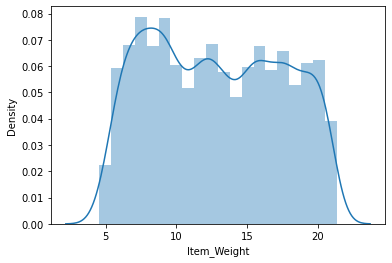

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

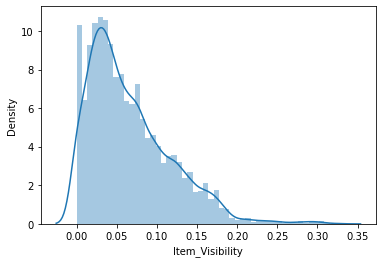

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

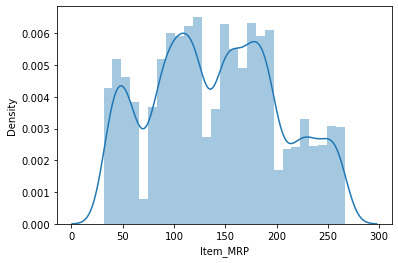

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

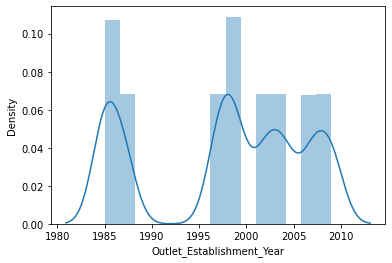

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

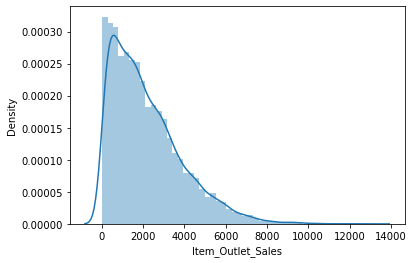

In [13]:
# Plots of the distributions for the train data

for i in Train_data.describe().columns:
    sns.distplot(Train_data[i].dropna())
    plt.show()

The majority of the item weights are between 5 and 10 from the above plot. The item visibility for the majority of the products at the outlets were between 0 and 0.07. It is intuitive in that the majority of products are not in kioks or immediately accessible as customers enter the mall or supermarket. 

The mean retail price for items was between 75 and 125. 1985 and 1995 were the years that had the most outlet establishment year. The item outlet sales were skewed like item visibility with the majority of products sold below 2000. The items with less visibily had more sales for all outlets peharps because customers shop at their outlet by taking time to seach for products that they want to buy.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

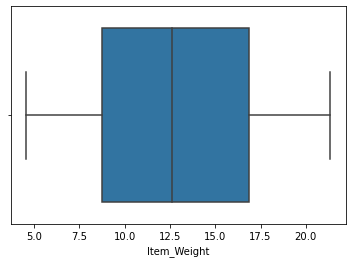

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

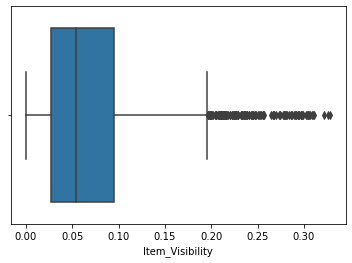

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

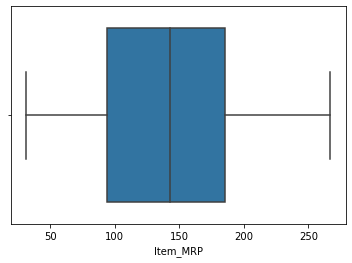

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

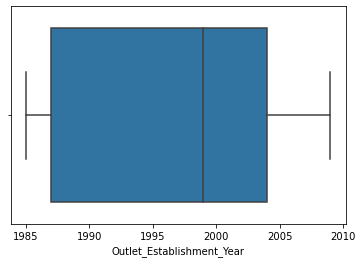

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

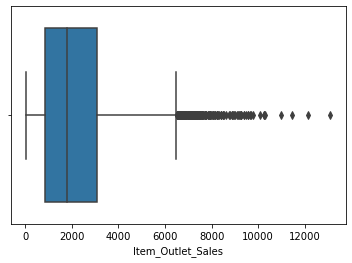

In [14]:
# Boxplots of the numerical columns

for i in Train_data.describe().columns:
    sns.boxplot(Train_data[i].dropna())
    plt.show()

The item weight and item mrp are approximately normal while the others appear to be skewed. Below are the visulization and analysis of the non numerical columns first of which is the count of the item type sold at all outlets

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

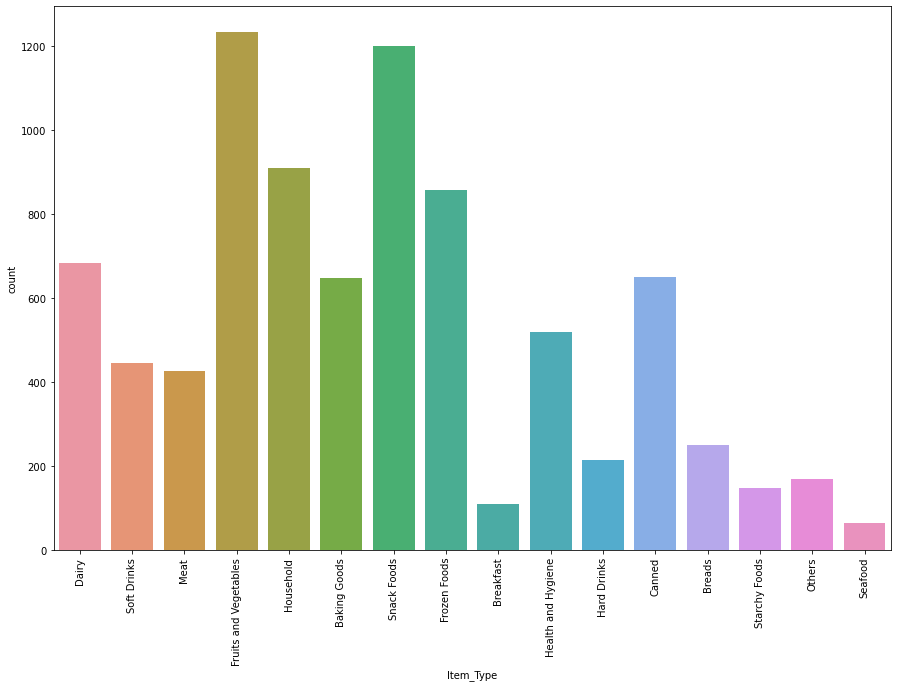

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(Train_data.Item_Type);
plt.xticks(rotation=90)
plt.show()

In [16]:
Train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

The two top categories of products purchased by consumers were fruits and vegetables. Breakfast and seafood were the least purchased items. The outlet size plot is below

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

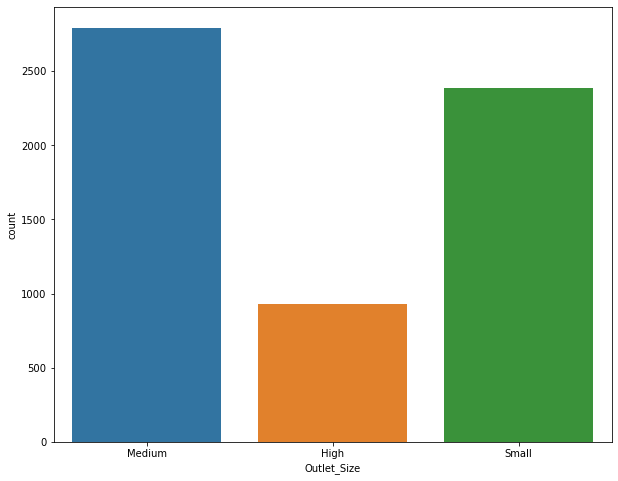

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(Train_data.Outlet_Size)
plt.show()

In [18]:
Train_data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

The majority of the BigMart outlets were medium sized followed by small sized outlets peharps outlets close to residential areas and shopping centers. They were 2793 and 2388 respectively. Comparing the number of high sized outlet one can deduce That consumers typically buy household items available in medium and small outlets which do not require big retail space.   

The outlet location type plot is below

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

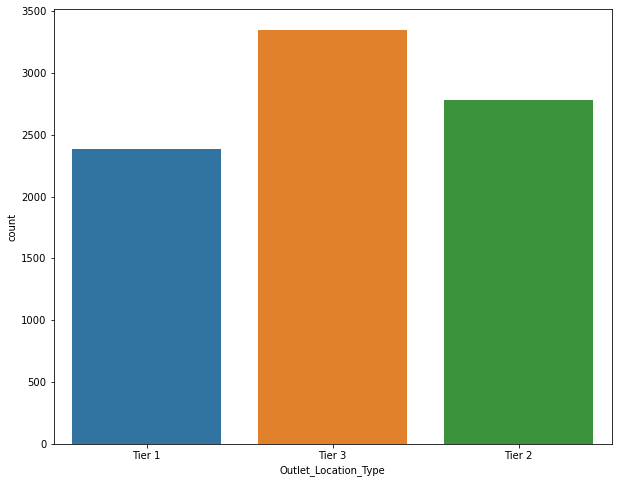

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(Train_data.Outlet_Location_Type)
plt.show()

In [20]:
Train_data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Tier 3 cities had the most outlets followed by Tier 2 and Tier 1 cities. Tier 3 cities just developing would have a lower cost of living and cheaper prices so it would be reasonable for BigMart to have the majority of their stores located there. 

The outlet types plot is below

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

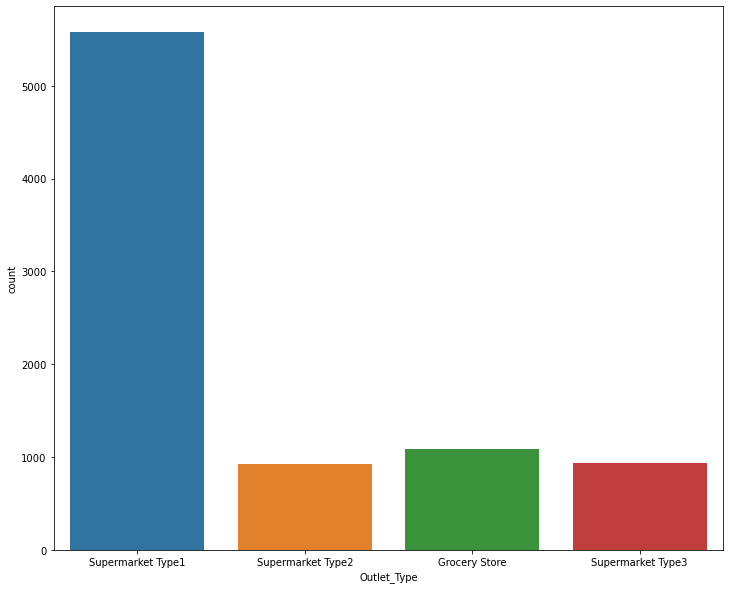

In [21]:
plt.figure(figsize=(12,10))
sns.countplot(Train_data.Outlet_Type)
plt.show()

In [22]:
Train_data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

The Type 1 supermarket had the majority of outlets followed by grocery stores. 

The relationship between the numerical values will be explored with the following plots

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

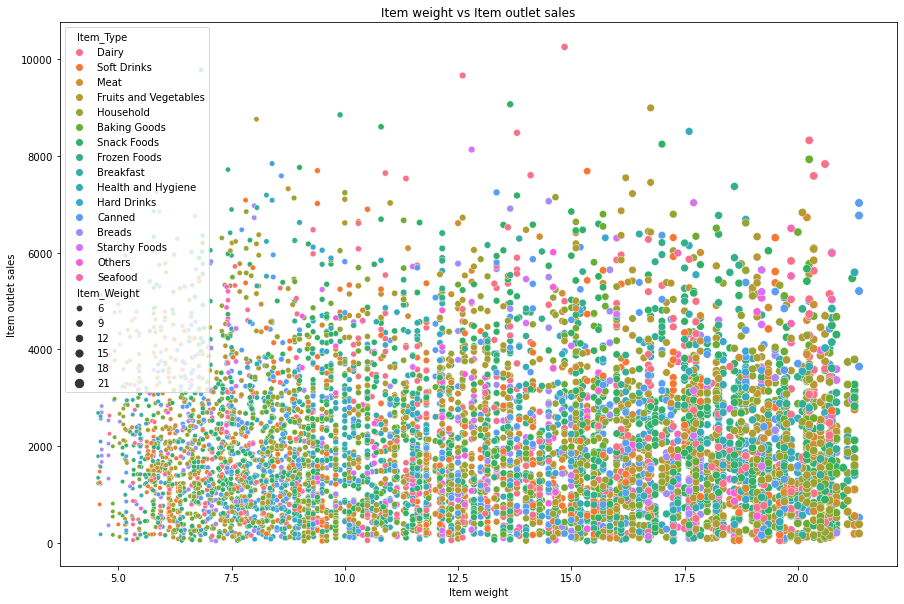

In [23]:
# Plot of item weight and item outlet sales

plt.figure(figsize=(15,10))
plt.xlabel('Item weight')
plt.ylabel('Item outlet sales')
plt.title('Item weight vs Item outlet sales')
sns.scatterplot(data=Train_data, x='Item_Weight', y='Item_Outlet_Sales', hue='Item_Type', size='Item_Weight');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

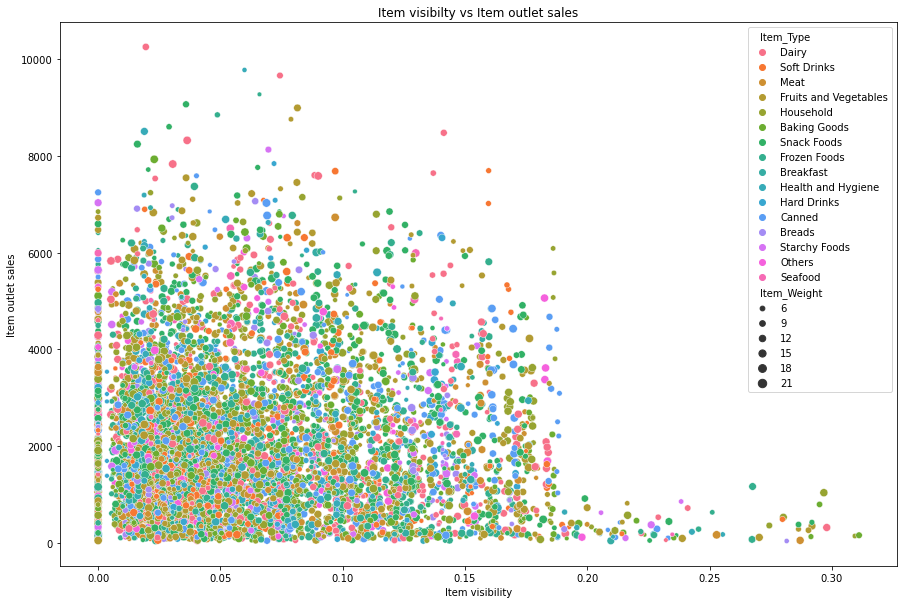

In [24]:
# Plot of Item visibility and outlet sales

plt.figure(figsize=(15,10))
plt.xlabel('Item visibility')
plt.ylabel('Item outlet sales')
plt.title('Item visibilty vs Item outlet sales')
sns.scatterplot(data=Train_data, x='Item_Visibility', y='Item_Outlet_Sales', hue='Item_Type', size='Item_Weight');

There are no apparent relationships between the item outlet sales and Item weight or Item visiibility. When item outlet sales are high for instance above 8000 customers typically buy dairy products, vegetables, baking goods and snacks for all item weights and visibility. Also for highly visible products the item outlet sales are lower being that customers go to search and buy houshold products that they need such as food items 

Next exploration of how outlet type impacts sales is done below

In [25]:
Outlet_pivot = pd.pivot_table(index = 'Outlet_Type', values='Item_Outlet_Sales', aggfunc=np.median, data=Train_data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
Outlet_pivot

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,256.9988
Supermarket Type1,1990.7420
Supermarket Type2,1655.1788
Supermarket Type3,3364.9532


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

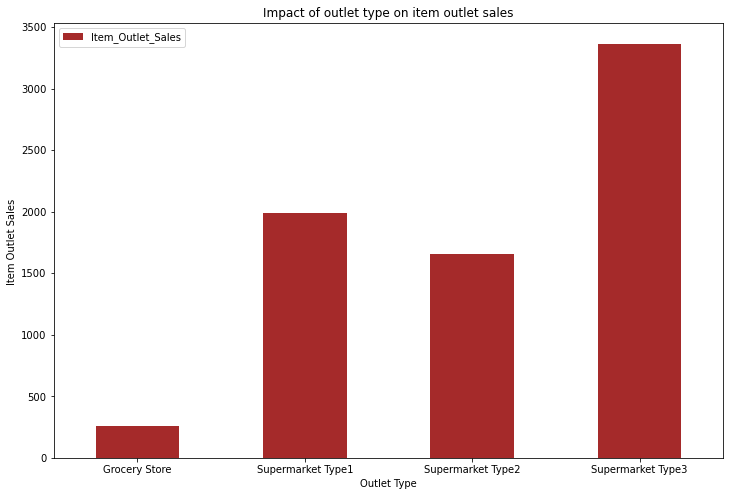

In [27]:
Outlet_pivot.plot(kind='bar', color='brown', figsize=(12,8))
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales ')
plt.title('Impact of outlet type on item outlet sales')
plt.xticks(rotation=0)
plt.show()

The outlet type that had the most impact on the item outlet sales was the supermarket type 3 and the least impact was grocery stores peharps because supermarkets offer other household items and variety of food choices compared to a grocery store.

The impact of fat content on the item outlet sales is explored below

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

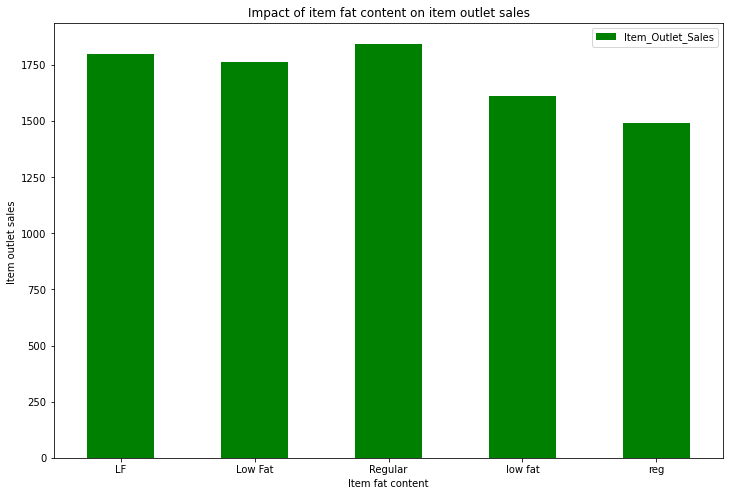

In [28]:
Fat_pivot = pd.pivot_table(index = 'Item_Fat_Content', values='Item_Outlet_Sales', aggfunc=np.median, data=Train_data)

Fat_pivot.plot(kind='bar', color='green', figsize=(12,8))
plt.xlabel('Item fat content')
plt.ylabel('Item outlet sales ')
plt.title('Impact of item fat content on item outlet sales')
plt.xticks(rotation=0)
plt.show()

In [29]:
df.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

LF, Low Fat and low fat are the same thing. They will be joined together in the dataset to have just Regular and Low Fat for item fat content and the above plot will be plotted with the updated information

In [30]:
df['Item_Fat_Content'] =  df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'})

In [31]:
df.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [32]:
Train_data['Item_Fat_Content'] = Train_data['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

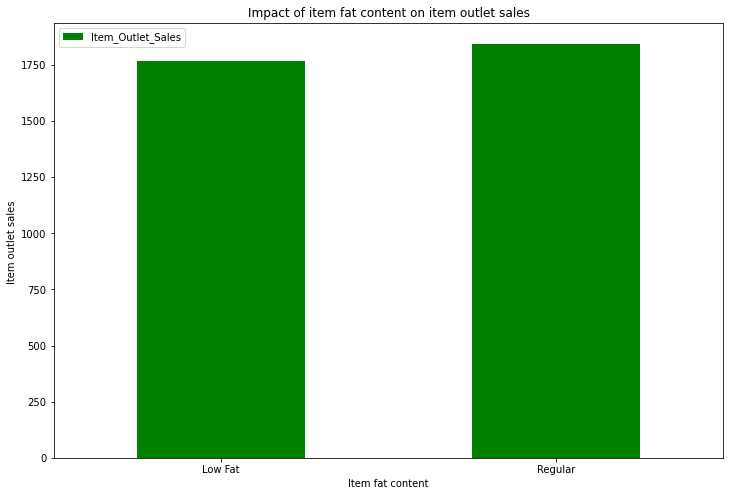

In [33]:
Fat_pivot = pd.pivot_table(index = 'Item_Fat_Content', values='Item_Outlet_Sales', aggfunc=np.median, data=Train_data)

Fat_pivot.plot(kind='bar', color='green', figsize=(12,8))
plt.xlabel('Item fat content')
plt.ylabel('Item outlet sales ')
plt.title('Impact of item fat content on item outlet sales')
plt.xticks(rotation=0)
plt.show()

Reular fat content in the products drove the outlet sales for a little bit more items compared to low fat items. The relationships between the numerical variables will be explored using correlation plots

In [34]:
Train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

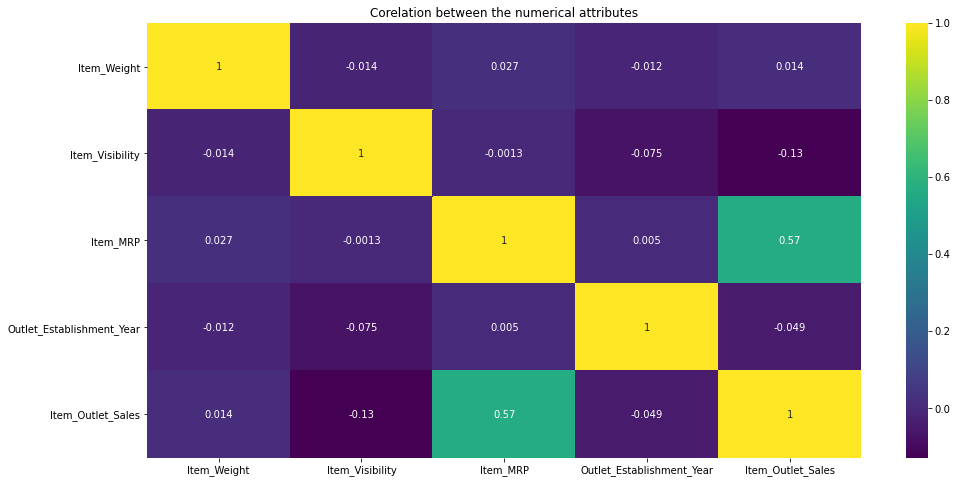

In [35]:
plt.figure(figsize=(16,8))
sns.heatmap(Train_data.corr(), annot=True, vmax=1, cmap='viridis')
plt.title('Corelation between the numerical attributes');

From the above heatmap there are no strong positive or negative correlation between the attributes

## Feature engineering selection and transformation

The two features that have NaN values are the item weight and the outlet size. From the boxplots the item weight data is normally distributed. The NaN values will be replaced by the mean of the distribution. For the outlet size medium outlet size will be used to replace the missing values since its the category with the majority of the outlet type 

In [36]:
df['Item_Weight'].mean()

12.792854228644991

In [37]:
# Replacing the NaN values with the mean for item weight

df['Item_Weight'].fillna(value=df['Item_Weight'].mean(), inplace=True)

In [38]:
# Value counts for the outlet count column

df.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [39]:
# Replacing the NaN values with the mean for outlet size

df['Outlet_Size'].fillna(value='Medium', inplace=True)

In [40]:
# Searching for NaN values after imputation

df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

From the visibility variable a value of zero from the summary statistics for items sold from all outlets is not intuitive. From the distribution of the visibility values the best value that can replace 0 is the median of the distribution judging from its skewed boxplot distribution. 

In [41]:
df['Item_Visibility'].replace(0.0, df['Item_Visibility'].median(), inplace=True)

# df['Item_Visibility'].fillna(df['Item_Visibility'].median(), inplace=True)

In [42]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

0

A new derived feature from the Outlet establishment year gives how many years the outlet has been established up until the last year in the column's data

In [43]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
2004    1550
1997    1550
1999    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [44]:
df['Outlet_Years'] = 2009 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

The maximum number of years for all of the outlets is 24 years while the average number of years for outlets is 11 years

A look at the item identifier column's entries help to identify each item sold from the store which each identifier starting with a FD food item, DR drink item or NC non consumerable. A new column will be created to categorize all of the items into these three groups rather than the 16 categories identifying all of the items

In [45]:
df['Item_Identifier']

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 14204, dtype: object

In [46]:
# Extracting the first two letter codes from each item identifier

df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: New_Item_Type, Length: 14204, dtype: object

In [47]:
# Renaming the extracted letter codes

df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR': 'Drinks'})
df['New_Item_Type']

0                  Food
1                Drinks
2                  Food
3                  Food
4        Non-Consumable
              ...      
14199              Food
14200              Food
14201    Non-Consumable
14202              Food
14203              Food
Name: New_Item_Type, Length: 14204, dtype: object

In [48]:
df['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

The item fat content has two categories only for all items with non consumerable items for some items categoried as fat items. A new category will be created for them called Non edible

In [49]:
df.loc[df['New_Item_Type']=='Non-Consumable','Item_Fat_Content'] = 'Non-Edible'

In [50]:
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

Visible products for the most part have more sales than those hidden in the stores based on items that are typically bought by consumers. A new feature will give a percentage rank of how important an item is which makes its visibility higher at a given outlet compared to other outlets 

In [51]:
# Displaying item identifier and its corresponding visibility

item_vis_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [52]:
item_vis_avg

,Item_Visibility
Item_Identifier,
DRA12,0.046942
DRA24,0.045646
DRA59,0.138786
DRB01,0.086489
DRB13,0.012801
...,...
NCZ30,0.032704
NCZ41,0.063148
NCZ42,0.016417


In [53]:
# Function for finding visibility for each item identifier

func = lambda x: x['Item_Visibility'] / item_vis_avg['Item_Visibility'][item_vis_avg.index == x['Item_Identifier']][0]
df['item_visible_avg'] = df.apply(func, axis=1).astype('float')

In [54]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_Type,item_visible_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food,0.733187
3,FDX07,19.20,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food,1.810406
4,NCD19,8.93,Non-Edible,0.054021,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumable,1.944117


Some of the categorical variables will be encoded using integers to enable them to be used as features during model training. One hot encoding and label encoders will be used to transform these categorical variables 

In [55]:
# Label encoding the categorical variables 

df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Outlet_Years',
       'New_Item_Type', 'item_visible_avg'],
      dtype='object')

In [56]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Creating a new column from outlet identifier
df['Outlet'] = encoder.fit_transform(df['Outlet_Identifier'])

cat_cols = ['Outlet_Identifier', 'Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'New_Item_Type', 'Outlet_Type', 'Outlet']
for i in cat_cols:
    df[i] = encoder.fit_transform(df[i])

In [57]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_Type,item_visible_avg,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,train,10,1,0.931078,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,train,0,0,0.933420,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,train,10,1,0.733187,9
3,FDX07,19.20,2,0.054021,Fruits and Vegetables,182.0950,0,1998,1,2,0,732.3800,train,11,1,1.810406,0
4,NCD19,8.93,1,0.054021,Household,53.8614,1,1987,0,2,1,994.7052,train,22,2,1.944117,1


To avoid misinterpretation of integer categories created by the encoder above the categorical data would be split into dummy variables for each category in its separate column

In [58]:
df = pd.get_dummies(data=df, columns=cat_cols)

<IPython.core.display.Javascript object>

In [59]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
item_visible_avg             float64
Outlet_Identifier_0            uint8
Outlet_Identifier_1            uint8
Outlet_Identifier_2            uint8
Outlet_Identifier_3            uint8
Outlet_Identifier_4            uint8
Outlet_Identifier_5            uint8
Outlet_Identifier_6            uint8
Outlet_Identifier_7            uint8
Outlet_Identifier_8            uint8
Outlet_Identifier_9            uint8
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
O

In [60]:
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,item_visible_avg,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,1999,3735.1380,train,10,0.931078,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,2009,443.4228,train,0,0.933420,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,1999,2097.2700,train,10,0.733187,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.054021,Fruits and Vegetables,182.0950,1998,732.3800,train,11,1.810406,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.054021,Household,53.8614,1987,994.7052,train,22,1.944117,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,Snack Foods,141.3154,1997,NaN,test,12,0.874729,...,0,0,0,0,0,0,0,0,1,0
14200,FDD47,7.60,0.142991,Starchy Foods,169.1448,2009,NaN,test,0,0.878292,...,0,0,0,1,0,0,0,0,0,0
14201,NCO17,10.00,0.073529,Health and Hygiene,118.7440,2002,NaN,test,7,0.976879,...,0,0,0,0,0,0,0,1,0,0
14202,FDJ26,15.30,0.054021,Canned,214.6218,2007,NaN,test,2,0.576022,...,0,0,1,0,0,0,0,0,0,0


## Model Building

In [61]:
# Dropping unwanted columns
df.drop(['Item_Type', 'Outlet_Establishment_Year'], axis=1, inplace=True)

# Retrieving the training and testing data
train = df[df['source']=='train']
test = df[df['source']=='test']

# Dropping the source column
train.drop(['source'], axis=1, inplace=True)
   
# Dropping the source and item outlet sales
test.drop(['source', 'Item_Outlet_Sales'], axis=1, inplace=True)

X_train = train.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
y_train = train['Item_Outlet_Sales']
X_test = test.drop(['Item_Identifier'], axis=1).copy()

In [80]:
print(len(X_train.columns))
print(len(X_test.columns))

41
41


In [113]:
columns = list(X_test.columns)
columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Years',
 'item_visible_avg',
 'Outlet_Identifier_0',
 'Outlet_Identifier_1',
 'Outlet_Identifier_2',
 'Outlet_Identifier_3',
 'Outlet_Identifier_4',
 'Outlet_Identifier_5',
 'Outlet_Identifier_6',
 'Outlet_Identifier_7',
 'Outlet_Identifier_8',
 'Outlet_Identifier_9',
 'Item_Fat_Content_0',
 'Item_Fat_Content_1',
 'Item_Fat_Content_2',
 'Outlet_Location_Type_0',
 'Outlet_Location_Type_1',
 'Outlet_Location_Type_2',
 'Outlet_Size_0',
 'Outlet_Size_1',
 'Outlet_Size_2',
 'New_Item_Type_0',
 'New_Item_Type_1',
 'New_Item_Type_2',
 'Outlet_Type_0',
 'Outlet_Type_1',
 'Outlet_Type_2',
 'Outlet_Type_3',
 'Outlet_0',
 'Outlet_1',
 'Outlet_2',
 'Outlet_3',
 'Outlet_4',
 'Outlet_5',
 'Outlet_6',
 'Outlet_7',
 'Outlet_8',
 'Outlet_9']

In [82]:
# Scaling the training and testing datasets

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_fit = scaler.fit(X_train)
X_train =  scaler_fit.transform(X_train)
X_test = scaler_fit.transform(X_test)

In [83]:
X_train = pd.DataFrame(data=X_train, columns=columns)
X_test = pd.DataFrame(data=X_test, columns=columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,item_visible_avg,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,-0.839226,-1.092670,1.747454,-0.139541,-0.231736,-0.263920,-0.350395,-0.349128,-0.349551,-0.256985,...,-0.263920,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,2.857362
1,-1.639047,-1.026582,-1.489023,-1.334103,-0.223638,-0.263920,-0.350395,-0.349128,2.860816,-0.256985,...,-0.263920,-0.350395,-0.349128,2.860816,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973
2,1.101168,-1.078090,0.010040,-0.139541,-0.916119,-0.263920,-0.350395,-0.349128,-0.349551,-0.256985,...,-0.263920,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,2.857362
3,1.503445,-0.315933,0.660050,-0.020085,2.809316,3.789031,-0.350395,-0.349128,-0.349551,-0.256985,...,3.789031,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973
4,-0.926780,-0.315933,-1.399220,1.293934,3.271738,-0.263920,2.853918,-0.349128,-0.349551,-0.256985,...,-0.263920,2.853918,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973


### Linear regression model

In [85]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)
lr_fit = lr.fit(X_train, y_train)
lr_pred = lr_fit.predict(X_test)

In [86]:
lr_pred

array([1826.20014308, 1580.44395833, 1877.13145833, ..., 1810.84239583,
       3532.94395833, 1263.84239583])

In [87]:
print('The accuracy for the linear regresion model:', str(round(lr_fit.score(X_train, y_train)*100))+'%')

The accuracy for the linear regresion model: 56%


### Decision tree regressor

In [88]:
from sklearn.tree import DecisionTreeRegressor

tr = DecisionTreeRegressor(max_depth=20, min_samples_leaf=10)
tr_fit = tr.fit(X_train, y_train)
tr_pred = tr_fit.predict(X_test)

In [89]:
tr_pred

array([1915.56208333, 1049.16764   ,  933.58476   , ..., 2280.7395125 ,
       2820.46196   , 1737.88595556])

In [90]:
print('The accuracy for the decision tree regressor model:', str(round(tr_fit.score(X_train, y_train)*100))+'%')

The accuracy for the decision tree regressor model: 71%


### Random forest regressor

In [91]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, max_depth=6, min_samples_leaf=100, n_jobs=4)
rf_fit = rf.fit(X_train, y_train)
rf_pred = rf_fit.predict(X_test)

In [92]:
rf_pred

array([1652.87862367, 1367.64436396,  572.91552479, ..., 1936.34923381,
       3695.24591827, 1293.32674857])

In [93]:
print('The accuracy for the random forest regressor model:', str(round(rf_fit.score(X_train, y_train)*100))+'%')

The accuracy for the random forest regressor model: 61%


### Xgboost regressor

In [94]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.056, max_depth=9)
xgb_fit = xgb.fit(X_train, y_train)
xgb_pred = xgb_fit.predict(X_test)

In [95]:
xgb_pred

array([1384.7527, 1233.8021,  801.4239, ..., 1887.3265, 3633.8655,
       1383.6956], dtype=float32)

In [96]:
print('The accuracy for the random forest regressor model:', str(round(xgb_fit.score(X_train, y_train)*100))+'%')

The accuracy for the random forest regressor model: 98%


### Support vector regressor 

In [97]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', tol=0.0001, C=3)
svr_fit = svr.fit(X_train, y_train)
svr_pred = svr_fit.predict(X_test)

In [98]:
svr_pred

array([1735.59642729, 1461.58580727, 1777.87043953, ..., 1767.12098203,
       3228.0010826 , 1239.9880171 ])

In [99]:
print('The accuracy for the support vector regressor model:', str(round(svr_fit.score(X_train, y_train)*100))+'%')

The accuracy for the support vector regressor model: 55%


### Decision tree regressor

In [100]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=2)
dtree_fit = dtree.fit(X_train, y_train)
dtree_pred = dtree_fit.predict(X_test)

In [101]:
dtree_pred

array([1663.94277662, 1283.75606768,  587.84291757, ..., 1759.30992   ,
       4015.46610821, 1283.75606768])

In [102]:
print('The accuracy for the decision tree regressor model:', str(round(dtree_fit.score(X_train, y_train)*100))+'%')

The accuracy for the decision tree regressor model: 66%


### Gradient boosting regressor

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(learning_rate=0.056, n_estimators=1000, max_depth=9)
gbr_fit = gbr.fit(X_train, y_train)
gbr_pred = gbr_fit.predict(X_test)

In [104]:
gbr_pred

array([1191.46435317, 1353.18674633,  737.78742934, ..., 2083.02649475,
       3821.96726045, 1545.11376971])

In [105]:
print('The accuracy for the gradient boosting regressor model:', str(round(gbr_fit.score(X_train, y_train)*100))+'%')

The accuracy for the gradient boosting regressor model: 99%


### Bagging regressor

In [106]:
from sklearn.ensemble import BaggingRegressor

bag = BaggingRegressor(n_estimators=1000)
bag_fit = bag.fit(X_train, y_train)
bag_pred = bag_fit.predict(X_test)

In [107]:
bag_pred

array([1648.0620638, 1247.416248 ,  834.234084 , ..., 1739.4903856,
       3794.8675838, 1485.6275036])

In [108]:
print('The accuracy for the bagging regressor model:', str(round(bag_fit.score(X_train, y_train)*100))+'%')

The accuracy for the bagging regressor model: 94%


Of the 8 models the one with the best performance is the Gradient Boosting Regressor. The model appears to be overfitting and that can be handled using feature seletion and using a grid search to initialize the parameters for the model

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector

grad_boost = GradientBoostingRegressor()

estimator = grad_boost
n_features_to_select = 10
# direction = 'forward'
# scoring = 'r2'
# cv = 8


selector = SequentialFeatureSelector(estimator=estimator, n_features_to_select=n_features_to_select)
selector.fit(X_train, y_train)

SequentialFeatureSelector(estimator=GradientBoostingRegressor(),
                          n_features_to_select=10)

In [116]:
selector.get_support()

array([ True,  True,  True,  True, False, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False])

In [123]:
# Showing selected columns

df = pd.DataFrame(data=[columns, selector.get_support()]).T
df.columns = ['Columns', 'Selected']
df

<IPython.core.display.Javascript object>

,Columns,Selected
0,Item_Weight,True
1,Item_Visibility,True
2,Item_MRP,True
3,Outlet_Years,True
4,item_visible_avg,False
5,Outlet_Identifier_0,False
6,Outlet_Identifier_1,False
7,Outlet_Identifier_2,False
8,Outlet_Identifier_3,False
9,Outlet_Identifier_4,True


In [124]:
# Dropping unselected columns

X_train_trans = selector.transform(X_train)

In [125]:
X_train_trans

array([[-0.83922588, -1.09266997,  1.74745381, ..., -0.38152918,
        -0.26391971, -0.35039545],
       [-1.63904672, -1.02658209, -1.48902325, ..., -0.38152918,
        -0.26391971, -0.35039545],
       [ 1.10116786, -1.07809028,  0.01004021, ..., -0.38152918,
        -0.26391971, -0.35039545],
       ...,
       [-0.53160248, -0.7011852 , -0.89720755, ..., -0.38152918,
        -0.26391971, -0.35039545],
       [-1.33378966,  1.54955147, -0.60797692, ..., -0.38152918,
        -0.26391971, -0.35039545],
       [ 0.46225773, -0.50293661, -1.05226104, ..., -0.38152918,
        -0.26391971, -0.35039545]])

In [126]:
X_test_trans = selector.transform(X_test)

In [133]:
X_test_trans

array([[ 1.87022636, -1.26617752, -0.53203517, ..., -0.38152918,
        -0.26391971, -0.35039545],
       [-1.07585927, -0.63488273, -0.86192009, ..., -0.38152918,
        -0.26391971, -0.35039545],
       [ 0.41493105,  0.61587473,  1.61809429, ...,  2.62103149,
         3.78903111, -0.35039545],
       ...,
       [-0.67358251,  0.0831006 , -0.35728725, ..., -0.38152918,
        -0.26391971, -0.35039545],
       [ 0.58057442, -0.31593312,  1.18238875, ..., -0.38152918,
        -0.26391971, -0.35039545],
       [-0.79189921,  0.72111991, -0.98274279, ..., -0.38152918,
        -0.26391971, -0.35039545]])

In [175]:
cols = list(df[df['Selected']==True]['Columns'])

In [142]:
df2_X_trans = pd.DataFrame(X_train_trans, columns=cols)

<IPython.core.display.Javascript object>

In [143]:
df2_X_trans.head()

Columns,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Identifier_4,Outlet_Identifier_8,Item_Fat_Content_2,Outlet_Type_0,Outlet_0,Outlet_1
0,-0.839226,-1.092670,1.747454,-0.139541,-0.256985,-0.349973,-0.738147,-0.381529,-0.263920,-0.350395
1,-1.639047,-1.026582,-1.489023,-1.334103,-0.256985,-0.349973,1.354743,-0.381529,-0.263920,-0.350395
2,1.101168,-1.078090,0.010040,-0.139541,-0.256985,-0.349973,-0.738147,-0.381529,-0.263920,-0.350395
3,1.503445,-0.315933,0.660050,-0.020085,-0.256985,-0.349973,1.354743,2.621031,3.789031,-0.350395
4,-0.926780,-0.315933,-1.399220,1.293934,-0.256985,-0.349973,-0.738147,-0.381529,-0.263920,2.853918


With the selected features a new Gradient Boosting model is trained below and afterwards the important features from the model will be determined

In [145]:
gbr = GradientBoostingRegressor(learning_rate=0.056, n_estimators=1000, max_depth=9)
gbr_fit = gbr.fit(df2_X_trans, y_train)
gbr_pred = gbr_fit.predict(df2_X_trans)

In [146]:
gbr_pred

array([3957.40825788,  507.91973112, 2162.56108367, ..., 1220.84979375,
       1865.84350372,  956.03688705])

In [147]:
print('The accuracy for the gradient boosting regressor model with reduced features:', str(round(gbr_fit.score(X_train_trans, y_train)*100))+'%')

The accuracy for the gradient boosting regressor model with reduced features: 98%


In [161]:
gbr_fit.feature_importances_

array([4.95323297e-02, 1.36143647e-01, 4.85653397e-01, 1.08973747e-01,
       2.61717781e-04, 6.33824493e-03, 7.68870648e-03, 2.00063037e-01,
       3.66196685e-04, 4.97897598e-03])

In [179]:
df = pd.concat([pd.Series(cols),pd.Series(list(gbr_fit.feature_importances_))], axis=1)
df.columns = ['Features','Importance']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [182]:
df.sort_values(by='Importance', ascending=False)

,Features,Importance
2,Item_MRP,0.485653
7,Outlet_Type_0,0.200063
1,Item_Visibility,0.136144
3,Outlet_Years,0.108974
0,Item_Weight,0.049532
6,Item_Fat_Content_2,0.007689
5,Outlet_Identifier_8,0.006338
9,Outlet_1,0.004979
8,Outlet_0,0.000366
4,Outlet_Identifier_4,0.000262


In [183]:
significant_cols = ['Item_MRP', 'Outlet_Type_0', 'Item_Visibility', 'Outlet_Years']

In [186]:
X_sig = df2_X_trans[significant_cols]
X_sig.head()

Columns,Item_MRP,Outlet_Type_0,Item_Visibility,Outlet_Years
0,1.747454,-0.381529,-1.092670,-0.139541
1,-1.489023,-0.381529,-1.026582,-1.334103
2,0.010040,-0.381529,-1.078090,-0.139541
3,0.660050,2.621031,-0.315933,-0.020085
4,-1.399220,-0.381529,-0.315933,1.293934


In [187]:
gbr = GradientBoostingRegressor(learning_rate=0.056, n_estimators=1000, max_depth=9)
gbr_fit = gbr.fit(X_sig, y_train)
gbr_pred = gbr_fit.predict(X_sig)

In [188]:
gbr_pred

array([3897.39566474,  523.49242512, 2219.69308514, ..., 1212.81395775,
       1845.62991832, 1040.1728786 ])

In [190]:
print('The accuracy for the gradient boosting regressor model with reduced features:', str(round(gbr_fit.score(X_sig, y_train)*100))+'%')

The accuracy for the gradient boosting regressor model with reduced features: 97%


## Conclusion

The gradient boosting regressor provided the best model with a 97% accuracy using feature selection and the significant features  that were important in predicting the Item output sales. 

The most important feature in predicting the sales of an item for a particular outlet from the data model is the item's medium retail price which is understandable because customers will buy products from an outlet that has reasonable prices. The other significant feature is the type of outlet specifically supermarket, the item's visibility especially if it is a item consumers typically buy. Also the outlet years affects the sales of an item from a given outlet with stores that have been serving customers receiving more sales than newer ones.